# Matthew King-Roskamp
## Project codebase
## Student number: 260976649
## Krylov subspace methods

In [2]:
# Standard Preamble, importing necessary packages
import numpy as np;
import matplotlib.pyplot as pl;

This repository of code is *not* intended as a stand alone document. This is rather intended as an appendix of all the code used to create any figures used in the project. As a result, comments throughout will be quite sparse, only intended to notify the reader of any implementation-specific issues or choices. For and discussion of these methods, see the project.

## Methods using orthogonal basis of $K_{n}$ 

In [3]:
def ArnoldiIteration(A,b,iterations):
    # Implemented bases on (e.g. Treffethen & Bau)
    # Note b needs t be of shape (m) for this to work (a row vector!)
    m = np.shape(A)[0];
    H = np.zeros([iterations+1,iterations]);
    Q = np.zeros([m,iterations+1]);

    q=b/np.linalg.norm(b); # this will Change per iteration, care for redefinition
    Q[:,0] = q

    for n in range(iterations):
        v = np.matmul(A,q);
        
        for j in range(iterations+1):
            H[j,n] = np.dot(Q[:,j], v) 
            v = v - H[j,n]*Q[:,j]

        H[n+1,n] = np.linalg.norm(v)
        # Specify some internal tolerance:
        tol = 1e-12
        
        if H[n + 1, n] > tol:
            # if the "pivot" entry above tolerance:
            q = v / H[n + 1, n]
            Q[:, n+1] = q
        else:
            # if "pivot" zero, we have spanned the entire range and we have invariance AK_{n} + K_{n}
            return Q, H
    return Q, H

In [4]:
def GMRES(A,b,iterations):
    n = np.shape(A)[0];
    e = np.zeros(iterations+1);
    e[0] =1.0; 
    [Q,H] =ArnoldiIteration(A,b,iterations);
    # least squares solution
    y = np.linalg.lstsq(H,np.linalg.norm(b)*e,rcond =None)[0];
    
    return np.matmul(Q[0:n,0:iterations],y);

In [5]:
def FOM(A,b,iterations):
    n = np.shape(A)[0];
    e = np.zeros(iterations);
    e[0] =1.0; 
    [Q,H] =ArnoldiIteration(A,b,iterations);
    #inverting the square part of H: This can be singular!
    y = np.matmul(np.linalg.inv(H[0:iterations,0:iterations]),np.linalg.norm(b)*e);
    
    return np.matmul(Q[0:n,0:iterations],y);

In [12]:
def GCR(A,b,iterations):# Orthogonal in A-norm
    n = A.shape[0]; 
    x = np.copy(x0);
    
    r = np.copy(b);
    
    p = np.copy(r);
    
    for i in range(iterate):
        xLast = np.copy(x)
        alpha = (np.matmul(np.transpose(r),np.matmul(A,r)))/(np.matmul(np.matmul(np.transpose(np.matmul(A,p),A),p)));
        x = x + alpha*p;
        rLast = np.copy(r);
        r = r - alpha*(np.matmul(A,p));
        beta = (np.matmul(np.transpose(r),np.matmul(A,r)))/(np.matmul(np.transpose(rLast),np.matmul(A,rLast)));
        p = r + beta*p;
        if(np.linalg.norm(x-xLast < 10e-12)):
            return x
    return x;

In [13]:
def CG(A,b,iterate,x0):
    # Orthogonal in A-norm
    n = A.shape[0]; 
    x = np.copy(x0);
    
    r = np.copy(b);
    
    p = np.copy(r);
    
    for i in range(iterate):
        xLast = np.copy(x)
        alpha = (np.matmul(np.transpose(r),r))/(np.matmul(np.matmul(np.transpose(p),A),p));
        x = x + alpha*p;
        rLast = np.copy(r);
        r = r - alpha*(np.matmul(A,p));
        beta = (np.matmul(np.transpose(r),r))/(np.matmul(np.transpose(rLast),rLast));
        p = r + beta*p;
        if(np.linalg.norm(x-xLast < 10e-12)):
            return x
    return x;

## Methods using Biorthogonal Basis' of $K_{n}$

In [14]:
def LanczosBiorthogonal(A,v_in,w_in,n):
    # this assumes <v,w> =1 already!
    tol = 10**(-12);
    m = A.shape[0];
    V = np.zeros([m,n]);
    W = np.zeros([m,n]);
    beta =0;
    delta = 0;
    
    
    V[:,0] = v_in;
    W[:,0] = w_in;
    v = np.zeros(m);
    w= np.zeros(m);
    
    for j in range(n-1):
        alpha = (np.matmul(np.matmul(np.transpose(V[:,j]),A),W[:,j]));
        if(j>=1):
            v = np.matmul(A,V[:,j]) - alpha*V[:,j] - beta*V[:,j-1];
            w = np.matmul(np.transpose(A),W[:,j]) - alpha*W[:,j] - delta*W[:,j-1];
        else:
            v = np.matmul(A,V[:,j]) - alpha*V[:,j] ;
            w = np.matmul(np.transpose(A),W[:,j]) - alpha*W[:,j];
        delta = np.sqrt(np.abs(np.matmul(np.transpose(v),w)));
        if(delta < tol):
            return V,W;
        beta = np.matmul(np.transpose(v),w)/delta;
        W[:,j+1] = w/beta;
        V[:,j+1] = v/delta;
    return V,W;
            


In [15]:
def BICG(A,b,iterate,x0):
    n = A.shape[0]; 
    x = np.copy(x0);
    
    r = np.copy(b);
    p = np.copy(r);
    
    s = np.ones(n);
    q = np.copy(s);
    
    for i in range(iterate):
        alpha = (np.matmul(np.transpose(s),r))/(np.matmul(np.matmul(np.transpose(q),A),p))
        
        x = x + alpha*p;
        rLast = np.copy(r);
        r = r - alpha*(np.matmul(A,p));
        s = s - alpha*(np.matmul(np.transpose(A),q));
        
        
        beta = (np.matmul(np.transpose(r),r))/(np.matmul(np.transpose(rLast),rLast));
        p = r + beta*p;
        q = s + beta*q;
        
    return x;

In [16]:
def QMR(A,b,m):
    n = np.shape(A)[0];
    e = np.zeros(m);
    e[0] =1.0; 
    v_in = b/np.linalg.norm(b);
    w_in = np.random.normal(0,1,n);
    w_in = w_in/np.matmul(np.transpose(v_in),w_in);
    [V,W] =LanczosBiorthogonal(A,v_in,w_in,m);
    T = np.matmul(np.matmul(np.transpose(W),A),V);
    # least squares solution
    y = np.linalg.lstsq(T,np.linalg.norm(b)*e,rcond =None)[0];
    return np.matmul(V,y);

## Transpose free variants
Conjugate gradient squared:

In [17]:
def CGS(A,b,iterate):
     # Orthogonal in A-norm
    n = A.shape[0]; 
    x = np.copy(b);
    
    r = np.copy(b);
    r0 = np.random.normal(0,1,[n])
    u = np.copy(r);
    p = np.copy(r);
    
    for i in range(iterate):
        
        alpha = (np.matmul(np.transpose(r),r0))/(np.matmul(np.transpose(np.matmul(A,p)),r0))
        q = u - alpha*np.matmul(A,p);
        x = x + alpha*(u+q);
        
        rLast = np.copy(r);
        r = rLast - alpha*(np.matmul(A,u+q));
        
        beta = (np.matmul(np.transpose(r),r0))/(np.matmul(np.transpose(rLast),r0));
        u = r + beta*q;
        p = u+beta*(q+beta*p)
        
    return x;

## Comparisons (Accuracy)

In [30]:
# make everything self-adjoint for ease of comparison 
m = 30;
A = np.random.normal(0,1,[m,m]);
Tri = np.multiply(np.tri(m,m,1),np.transpose(np.tri(m,m,1)))
A = np.multiply(A,Tri);
A = A + np.transpose(A)

x= np.ones(m);
b = np.matmul(A,x);
tests = 10;

resultGMRES = np.zeros(m+1);
resultFOM = np.zeros(m+1);
resultCG = np.zeros(m+1);
resultCGR = np.zeros(m+1);
for n in np.arange(1,m):
    for i in range(tests):
        resultGMRES[n] = resultGMRES[n] + np.linalg.norm(GMRES(A,b,n)-x)/tests;
        resultFOM[n] = resultFOM[n] + np.linalg.norm(FOM(A,b,n)-x)/tests;
        resultCG[n] = resultCG[n] +np.linalg.norm(CG(A,b,n,np.random.normal(0,1,[m]))-x)/tests;
        resultCGR[n] = resultCGR[n] +np.linalg.norm(CG(A,b,n,np.random.normal(0,1,[m]))-x)/tests;
        
    

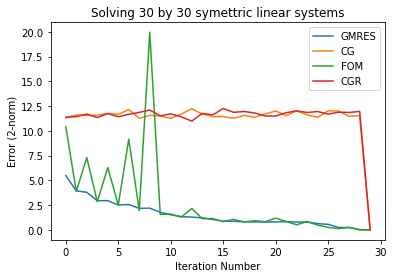

In [34]:
pl.plot(resultGMRES[1:m+1])
pl.plot(resultCG[1:m+1])
pl.plot(resultFOM[1:m+1])
pl.plot(resultCGR[1:m+1])
pl.legend(['GMRES','CG','FOM','CGR'])
pl.xlabel('Iteration Number')
pl.ylabel('Error (2-norm)')
pl.title('Solving 30 by 30 symettric linear systems');

In [85]:
# make everything self-adjoint for ease of comparison 
m = 30;
A = np.random.normal(0,1,[m,m]);
Tri = np.multiply(np.tri(m,m,1),np.transpose(np.tri(m,m,1)))
A = np.multiply(A,Tri);
A = A + np.transpose(A)

x= np.ones(m);
b = np.matmul(A,x);
tests = 10;

resultBICG = np.zeros(m+1);
resultQMR = np.zeros(m+1);

for n in np.arange(1,m):
    for i in range(tests):
        resultQMR[n] = resultQMR[n] + np.linalg.norm(QMR(A,b,n)-x)/tests;
        resultBICG[n] = resultBICG[n] +np.linalg.norm(BICG(A,b,n,np.random.normal(0,1,[m]))-x)/tests;
    
        
    

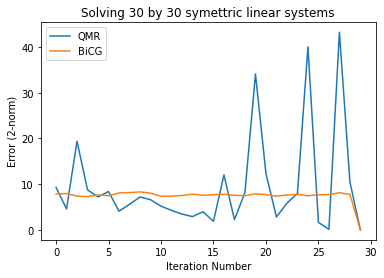

In [86]:
pl.plot(resultQMR[1:m+1])
pl.plot(resultBICG[1:m+1])
pl.legend(['QMR','BiCG'])
pl.xlabel('Iteration Number')
pl.ylabel('Error (2-norm)')
pl.title('Solving 30 by 30 symettric linear systems');

In [51]:
# make everything self-adjoint for ease of comparison 
m = 20;
A = np.random.normal(0,1,[m,m]);
Tri = np.multiply(np.tri(m,m,1),np.transpose(np.tri(m,m,1)))
A = np.multiply(A,Tri);
A = A + np.transpose(A)

x= np.ones(m);
b = np.matmul(A,x);
tests = 1;

resultCGS = np.zeros(m+1);

for n in np.arange(1,m):
    for i in range(tests):
        resultCGS[n] = resultCGS[n] + np.linalg.norm(CGS(A,b,n)-x)/tests;

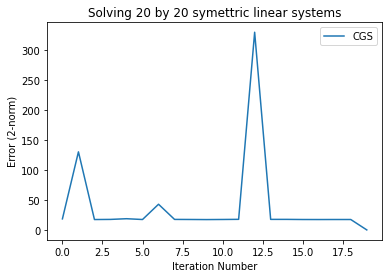

In [61]:
pl.plot(resultCGS[1:m+1]);
pl.legend(['CGS'])
pl.xlabel('Iteration Number')
pl.ylabel('Error (2-norm)')
pl.title('Solving 20 by 20 symettric linear systems');